<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/ML_Final_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the data set
data = pd.read_csv("Project DataSet.csv")
print(data.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

In [ ]:
# Seperating data
y2 = data.values[:, 0]        # diagnoses
x2 = data.values[:, 1:22]      # All inputs

# Seperating training and validation
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 2000)

# Scale data
from sklearn.preprocessing import StandardScaler
sc_x2 = StandardScaler()
x2_train = sc_x2.fit_transform(x2_train)
x2_test = sc_x2.transform(x2_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(x2_train, y2_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting test output
y2_pred = classifier2.predict(x2_test)
y2_pred[0:22]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Confusion matrix to check accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix2 = confusion_matrix(y2_test, y2_pred)
cnf_matrix2

array([[45475,   493],
       [ 4119,   649]])

In [ ]:
# Evaluation of model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1 score:",metrics.f1_score(y2_test, y2_pred))

Accuracy: 0.9090980763166193
Precision: 0.5683012259194395
Recall: 0.13611577181208054
F1 score: 0.21962774957698816


Text(0.5, 427.9555555555555, 'Predicted label')

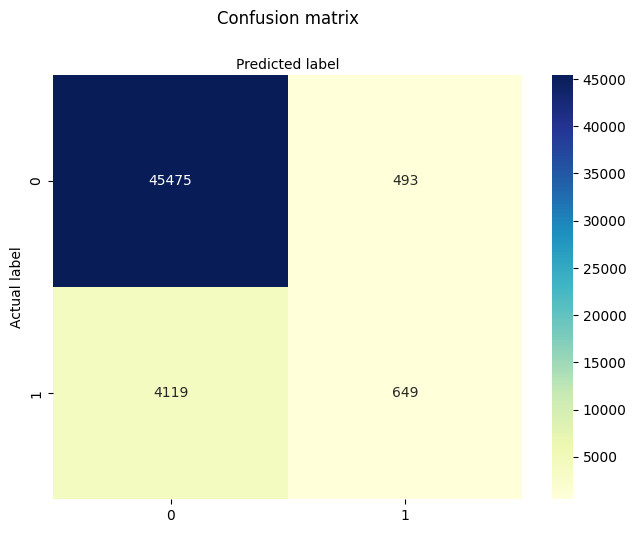

In [ ]:
# Creating visual confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')